In [1]:
# read the data and set the datetime as the index
# taken from Kaggle: https://www.kaggle.com/c/bike-sharing-demand/data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/bikeshare.csv'
bikes = pd.read_csv(url)

In [32]:
bikes.to_excel("bikes.xls",index=False)

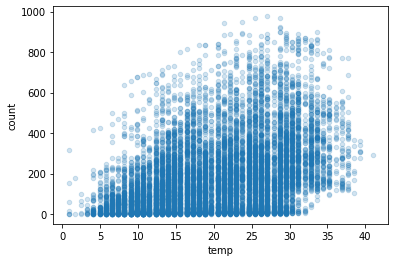

In [4]:
bikes.plot(kind='scatter', x='temp', y='count', alpha=0.2)

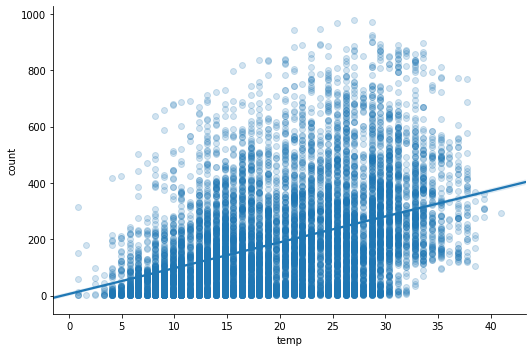

In [6]:
import seaborn as sns #using seaborn to get a line of best fit
sns.lmplot(x='temp', y='count', data=bikes, aspect=1.5, scatter_kws={'alpha':0.2})

In [7]:
bikes[['count', 'temp']].corr()

,count,temp
count,1.000000,0.394454
temp,0.394454,1.000000


In [7]:
# create X and y
feature_cols = ['temp'] # a lsit of the predictors
X = bikes[feature_cols] # subsetting our data to only the predictors
y = bikes['count'] # our response variable

In [8]:
# import scikit-learn, our machine learning module
from sklearn.linear_model import LinearRegression

In [11]:
linreg = LinearRegression() #instantiate a new model
linreg.fit(X, y) #fit the model to our data

# print the coefficients
print(linreg.intercept_)
print(linreg.coef_)

6.046212959616781
[9.17054048]


In [15]:
linreg.predict([[20]])
# make a prediction


array([189.45702259])

In [22]:
# create a list of features
feature_cols = ['temp', 'season', 'weather', 'humidity']
# create X and y
X = bikes[feature_cols]
y = bikes['count']

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

# pair the feature names with the coefficients
print(list(zip(feature_cols, linreg.coef_)))

[('temp', 7.864824992477439), ('season', 22.53875753246676), ('weather', 6.670302035923719), ('humidity', -3.118873382396501)]


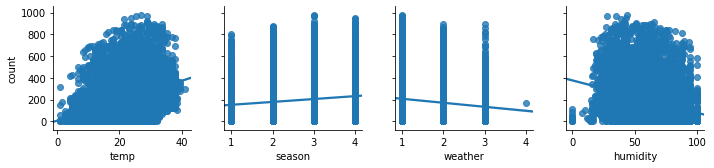

In [20]:
feature_cols = ['temp', 'season', 'weather', 'humidity']
# multiple scatter plots
sns.pairplot(bikes, x_vars=feature_cols, y_vars='count', kind='reg')

In [25]:
# example true and predicted response values
true = [9, 6, 7, 6]
pred = [8, 7, 7, 12]


# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print('MAE:', metrics.mean_absolute_error(true, pred))
print('MSE:', metrics.mean_squared_error(true, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(true, pred)))

MAE: 2.0
MSE: 9.5
RMSE: 3.082207001484488


In [26]:
from sklearn import metrics
# import metrics from scikit learn

feature_cols = ['temp']
# create X and y
X = bikes[feature_cols]
linreg = LinearRegression()
linreg.fit(X, y)
y_pred = linreg.predict(X)
np.sqrt(metrics.mean_squared_error(y, y_pred)) # RMSE
# Can be interpreted loosely as an average error

166.44886243326746

In [27]:
feature_cols = [
    'temp', 'humidity', 'season', 'holiday', 'workingday', 'windspeed', 'atemp'
]
# create X and y
X = bikes[feature_cols]
linreg = LinearRegression()
linreg.fit(X, y)
y_pred = linreg.predict(X)
np.sqrt(metrics.mean_squared_error(y, y_pred))  # RMSE
# Can be interpreted loosely as an average error

155.75989143430357

In [30]:
from sklearn.model_selection import train_test_split
# function that splits data into training and testing sets


feature_cols = ['temp']
X = bikes[feature_cols]
y = bikes['count']
X_train, X_test, y_train, y_test = train_test_split(X, y)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, y_pred))


170.1540560835659

In [31]:
feature_cols = ['temp', 'workingday']
X = bikes[feature_cols]
y = bikes['count']
X_train, X_test, y_train, y_test = train_test_split(X, y)
linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test, y_pred))


169.4457553071495